# Pearson's r

Pearson's r describes the relationship between two linearly related continuous-scale variables. It tells us how much two variables move together in standardized terms (high-to-high, low-to-high).

__Assumptions__
1. Interval or ratio level data.
2. Variables are approximately normally distributed.
3. No influential outliers or leverage points.
  - Most datasets will have some outliers, but we are particularly concerned with those exerting high amounts of influence within a distribution as they can distort a relationship.
4. Variables are linearly related.

__How Pearson's r Works__

In very plain mathematical language, Pearson's r is a standardized measure of covariance, or the covariance of two variables divided by the products of their standard deviations. The formula looks like:

$$
r = \frac{1}{n - 1} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{\sigma_x} \right) \left (\frac{y_i - \bar{y}}{\sigma_y} \right)
$$

- n is the number of matching variable pairs
- x, y are the individual paired data points
- $\bar{x}$, $\bar{y}$ are the means of each variable
- $\sigma_{x}$, $\sigma_{y}$ are the standard deviations of each variable

__How to Interpret__

| Value Range | Description |
|-------------|-------------|
| r = 0 | No correlation |
| r = 1 | Perfect correlation |
| 0 < r < 0.3 | Weak positive correlation |
| -0.3 < r < 0 | Weak negative correlation |
| 0.3 $\leq$ r < 0.7 | Moderate positive correlation |
| -0.7 < r $\leq$ -0.3 | Moderate negative correlation |
| r $\geq$ 0.7 | Strong positive correlation |
| r $\leq$ -0.7 | Strong negative correlation|

## Python Code Example

In [ ]:
# Import
import numpy as np
import pandas as pd

# Access datasets
import sklearn.datasets as datasets

# Correlation coefficient
import scipy.stats as stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a data set
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# View some details
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Learn more about the data set
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Before calculating Pearson's r, remember that we need to check some things. According to the description above, the data set has already been mean centered and scaled, so we can safely assume yes for these:
- Is the level of measurement interval or ratio? __Yes__.   
- Are the variables normally distributed? __Yes__.
- Are there no influential outliers or leverage points? __Yes__.
- Are the variables linearly related? __Let's verify__.

The easiest way to visualize your variables and knock out a visual inspection of multiple requirements at once is to use Seaborn's ```pairplot```.

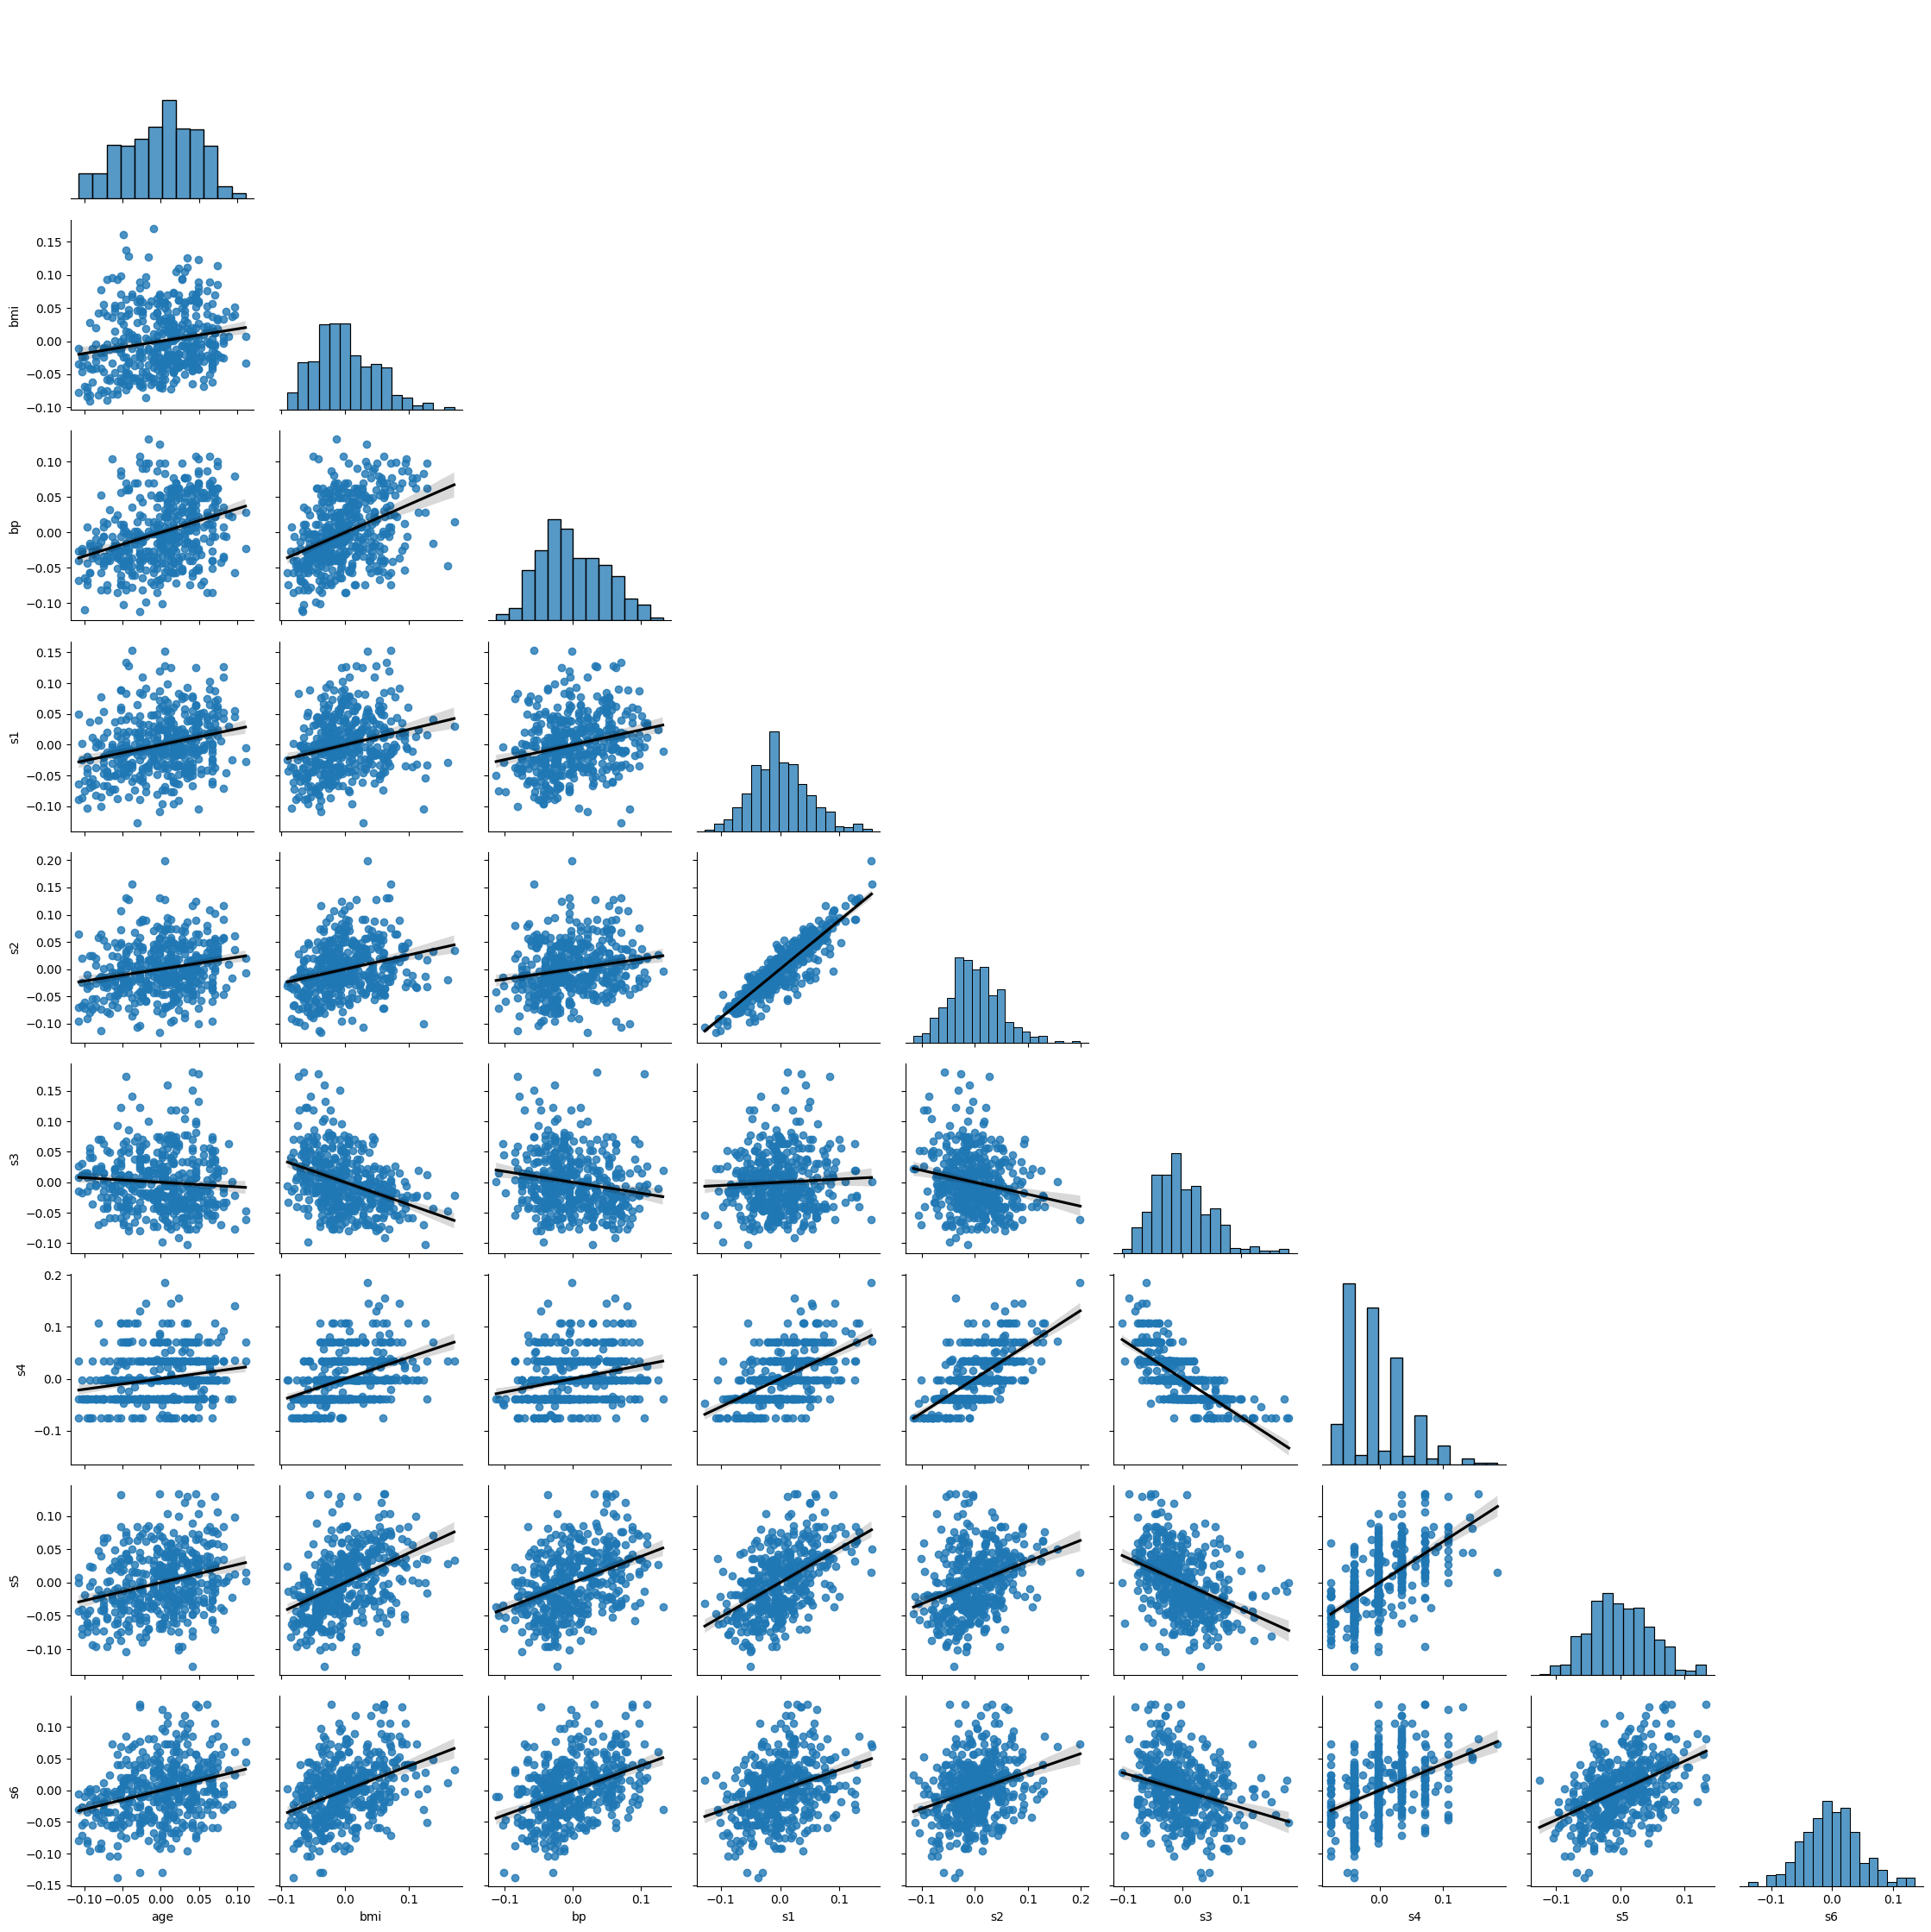

In [ ]:
# Pairplot
sns.pairplot(df.iloc[:, np.r_[0,2:10]], corner=True, kind='reg', plot_kws={'line_kws': {'color': 'black'}})

plt.tight_layout()
plt.show()

Based on the above you can note the following:
- Some variables have a slight positive skew to them.
- s4 seems not normally distributed, even after transformation.
- there is some lack of homoskedasticity mostly in the tails of distributions, reinforcing the perception of skewness.

While not perfect, no dataset is, we can still go forward with calculating Pearson's r.

When working with Pearson's r, you can focus on correlations one-by-one, or you can create a large matrix. I will show both ways.

In [ ]:
### One-by-one calculation example: BMI vs. all variables, skipping sex
# Calculate Pearson's r
for col in df.columns:
  # Exclude sex
  if col != 'sex' and col != 'bmi':
    # Calculate Pearson's r
    r, p = stats.pearsonr(df['bmi'], df[col])
    # Output display
    print(f'Pearson\'s r between BMI and {col}: {round(r,2)} | p-value: {p}')
    print('Positive relationship \n' if r > 0 else 'Negative relationship \n')


Pearson's r between BMI and age: 0.19 | p-value: 9.07679186541737e-05
Positive relationship 

Pearson's r between BMI and bp: 0.4 | p-value: 5.413797459644889e-18
Positive relationship 

Pearson's r between BMI and s1: 0.25 | p-value: 1.0321523755192965e-07
Positive relationship 

Pearson's r between BMI and s2: 0.26 | p-value: 2.5149089940348017e-08
Positive relationship 

Pearson's r between BMI and s3: -0.37 | p-value: 1.5944913641325182e-15
Negative relationship 

Pearson's r between BMI and s4: 0.41 | p-value: 1.0311961813114796e-19
Positive relationship 

Pearson's r between BMI and s5: 0.45 | p-value: 5.2375275993144475e-23
Positive relationship 

Pearson's r between BMI and s6: 0.39 | p-value: 2.1706571970977264e-17
Positive relationship 



In [ ]:
### Large matrix approach - skip sex
df.iloc[:, np.r_[0,2:10]].corr(method='pearson').style.background_gradient(cmap='coolwarm')

,age,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


This looks insightful, but it's a bit noisy. Let's clean it up using Seaborn's ```heatmap``` function.

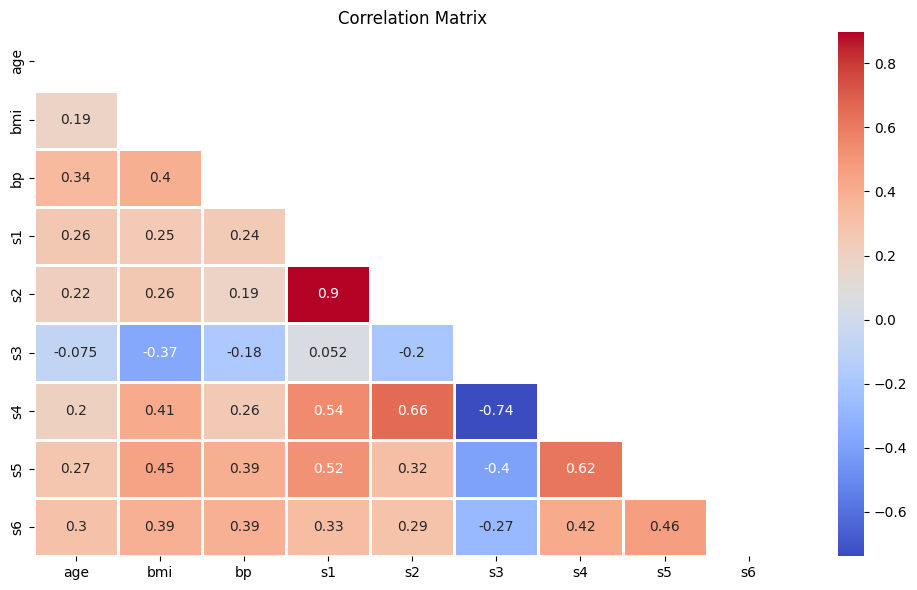

In [ ]:
# Calculate the correlation matrix
diabetes_corr = df.iloc[:, np.r_[0,2:10]].corr(method='pearson')

# Create a mask
mask = np.triu(np.ones_like(diabetes_corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_corr, mask=mask, annot=True, fmt='.2g', cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<a id='spearman'></a>